In [91]:
#Import all the necessary modules
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import export_graphviz
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Q1. Load the Credit dataset file into Python DataFrame. 


In [151]:
cred = pd.read_csv( 'credit.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. 



# Q2. Print 10 samples from the dataset

In [3]:
cred.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
cred.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [5]:
cred.shape

(1000, 17)

# Q4 Print the descriptive statistics of each & every column using describe() function

In [6]:
cred.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


# Q5 Covert categorical columns to numericals. Loops through each column and checks if the column type is object then converts those columns into numerical.

Or Encode all categorical variables into numbers so that you can apply models to it.

In [7]:
#df = pd.get_dummies(cred,drop_first=True)
for cols in cred.columns:
 if(cred[cols].dtype == "object"):
    cred[cols] = pd.Categorical(cred[cols]).codes
    
cred.dtypes

checking_balance         int8
months_loan_duration    int64
credit_history           int8
purpose                  int8
amount                  int64
savings_balance          int8
employment_duration      int8
percent_of_income       int64
years_at_residence      int64
age                     int64
other_credit             int8
housing                  int8
existing_loans_count    int64
job                      int8
dependents              int64
phone                    int8
default                  int8
dtype: object

# Q6 See the distribution of 'default' variable and plot it using appropriate graph.

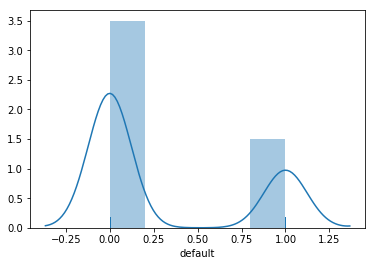

In [25]:
sns.distplot(cred["default"],kde=True, rug=True);

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
checking_balance,1.000000,-0.096005,-0.155113,0.029666,-0.092638,0.097452,-0.030032,0.029780,0.008835,0.083636,0.052184,-0.012511,0.084513,-0.029085,0.030417,0.037208,-0.302406
months_loan_duration,-0.096005,1.000000,0.148239,-0.128694,0.624984,0.020843,0.003824,0.074749,0.034067,-0.036136,0.003559,-0.157049,-0.011284,-0.215438,-0.023834,0.164718,0.214927
credit_history,-0.155113,0.148239,1.000000,-0.094504,0.109598,-0.073245,-0.053245,-0.016986,-0.031805,-0.057085,-0.066258,-0.015954,-0.177467,-0.009165,0.057804,-0.004388,0.193730
purpose,0.029666,-0.128694,-0.094504,1.000000,-0.210375,-0.001288,-0.027556,0.108289,-0.049809,-0.097851,0.060079,0.055853,-0.081676,0.047388,-0.116408,-0.135896,-0.055675
amount,-0.092638,0.624984,0.109598,-0.210375,1.000000,0.070127,0.038756,-0.271316,0.028926,0.032716,-0.020224,-0.135632,0.020795,-0.261139,0.017142,0.276995,0.154739
savings_balance,0.097452,0.020843,-0.073245,-0.001288,0.070127,1.000000,0.056865,0.032940,0.038741,0.094760,0.000726,-0.032711,0.015568,-0.040662,0.023693,0.075988,-0.103133
employment_duration,-0.030032,0.003824,-0.053245,-0.027556,0.038756,0.056865,1.000000,0.074664,0.218838,0.289741,-0.052460,-0.126529,0.085495,-0.142279,0.028019,0.110568,0.008932
percent_of_income,0.029780,0.074749,-0.016986,0.108289,-0.271316,0.032940,0.074664,1.000000,0.049302,0.058266,0.041423,-0.089405,0.021669,-0.078090,-0.071207,0.014413,0.072404
years_at_residence,0.008835,0.034067,-0.031805,-0.049809,0.028926,0.038741,0.218838,0.049302,1.000000,0.266419,-0.039284,-0.011941,0.089625,0.000450,0.042643,0.095359,0.002967
age,0.083636,-0.036136,-0.057085,-0.097851,0.032716,0.094760,0.289741,0.058266,0.266419,1.000000,-0.043787,-0.301419,0.149254,-0.001637,0.118201,0.145259,-0.091127


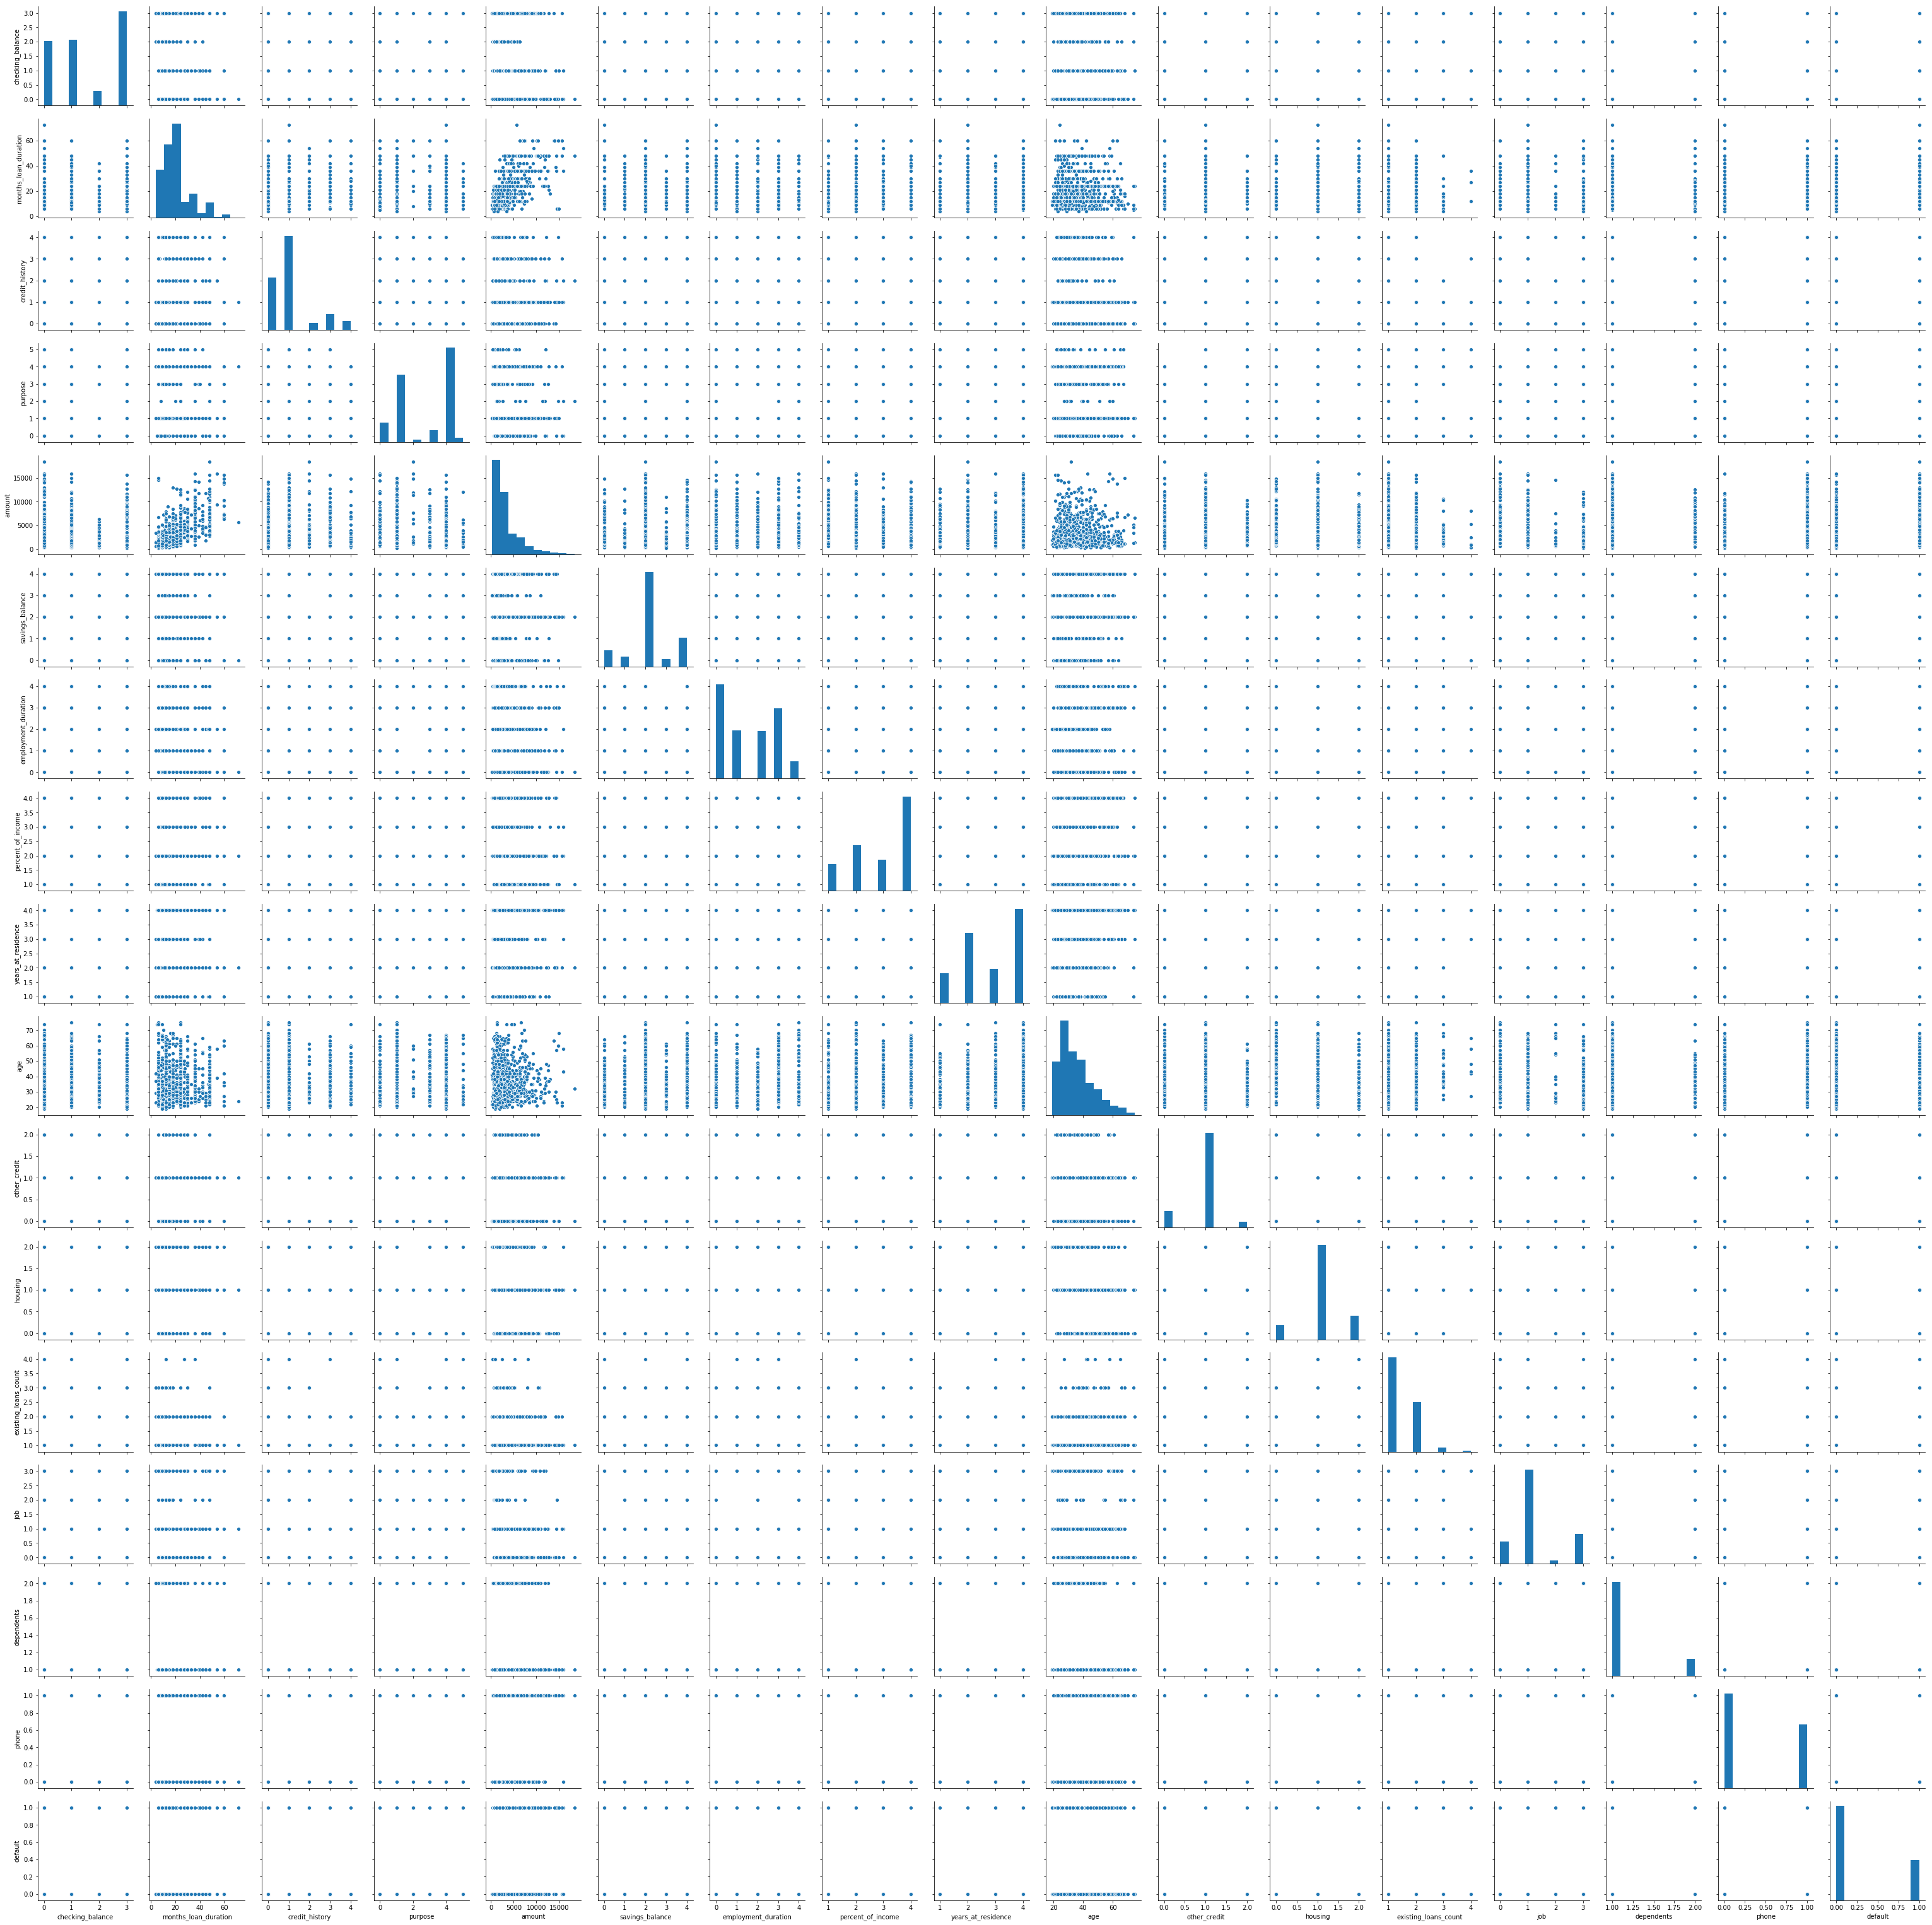

In [26]:
sns.pairplot(cred)

In [27]:
cred.corr()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
checking_balance,1.000000,-0.096005,-0.155113,0.029666,-0.092638,0.097452,-0.030032,0.029780,0.008835,0.083636,0.052184,-0.012511,0.084513,-0.029085,0.030417,0.037208,-0.302406
months_loan_duration,-0.096005,1.000000,0.148239,-0.128694,0.624984,0.020843,0.003824,0.074749,0.034067,-0.036136,0.003559,-0.157049,-0.011284,-0.215438,-0.023834,0.164718,0.214927
credit_history,-0.155113,0.148239,1.000000,-0.094504,0.109598,-0.073245,-0.053245,-0.016986,-0.031805,-0.057085,-0.066258,-0.015954,-0.177467,-0.009165,0.057804,-0.004388,0.193730
purpose,0.029666,-0.128694,-0.094504,1.000000,-0.210375,-0.001288,-0.027556,0.108289,-0.049809,-0.097851,0.060079,0.055853,-0.081676,0.047388,-0.116408,-0.135896,-0.055675
amount,-0.092638,0.624984,0.109598,-0.210375,1.000000,0.070127,0.038756,-0.271316,0.028926,0.032716,-0.020224,-0.135632,0.020795,-0.261139,0.017142,0.276995,0.154739
savings_balance,0.097452,0.020843,-0.073245,-0.001288,0.070127,1.000000,0.056865,0.032940,0.038741,0.094760,0.000726,-0.032711,0.015568,-0.040662,0.023693,0.075988,-0.103133
employment_duration,-0.030032,0.003824,-0.053245,-0.027556,0.038756,0.056865,1.000000,0.074664,0.218838,0.289741,-0.052460,-0.126529,0.085495,-0.142279,0.028019,0.110568,0.008932
percent_of_income,0.029780,0.074749,-0.016986,0.108289,-0.271316,0.032940,0.074664,1.000000,0.049302,0.058266,0.041423,-0.089405,0.021669,-0.078090,-0.071207,0.014413,0.072404
years_at_residence,0.008835,0.034067,-0.031805,-0.049809,0.028926,0.038741,0.218838,0.049302,1.000000,0.266419,-0.039284,-0.011941,0.089625,0.000450,0.042643,0.095359,0.002967
age,0.083636,-0.036136,-0.057085,-0.097851,0.032716,0.094760,0.289741,0.058266,0.266419,1.000000,-0.043787,-0.301419,0.149254,-0.001637,0.118201,0.145259,-0.091127


In [150]:
# Upon reviewing pair plot and correlations between variables, we could infer that there is a good relation ship between amount and months_loan_duration field 

# Q8 Split the dataset into training and test set in the ratio of 70:30 (Training:Test).</b>


In [32]:
X = cred.drop("default", axis=1)
y = cred["default"]

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 16) (700,)
(300, 16) (300,)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [78]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [110]:
testPreds = dt_model.predict(X_test)
testAccuracy = accuracy_score(y_test, testPreds)
print("Model Accuracy", testAccuracy * 100)
print(metrics.confusion_matrix(y_test, testPreds))

Model Accuracy 74.66666666666667
[[187  30]
 [ 46  37]]


Print the feature importance of the decision model - Optional

# Q11 - Display the above tree. You can use graphviz library for the same. You can save it in a Dot file first -- Optional

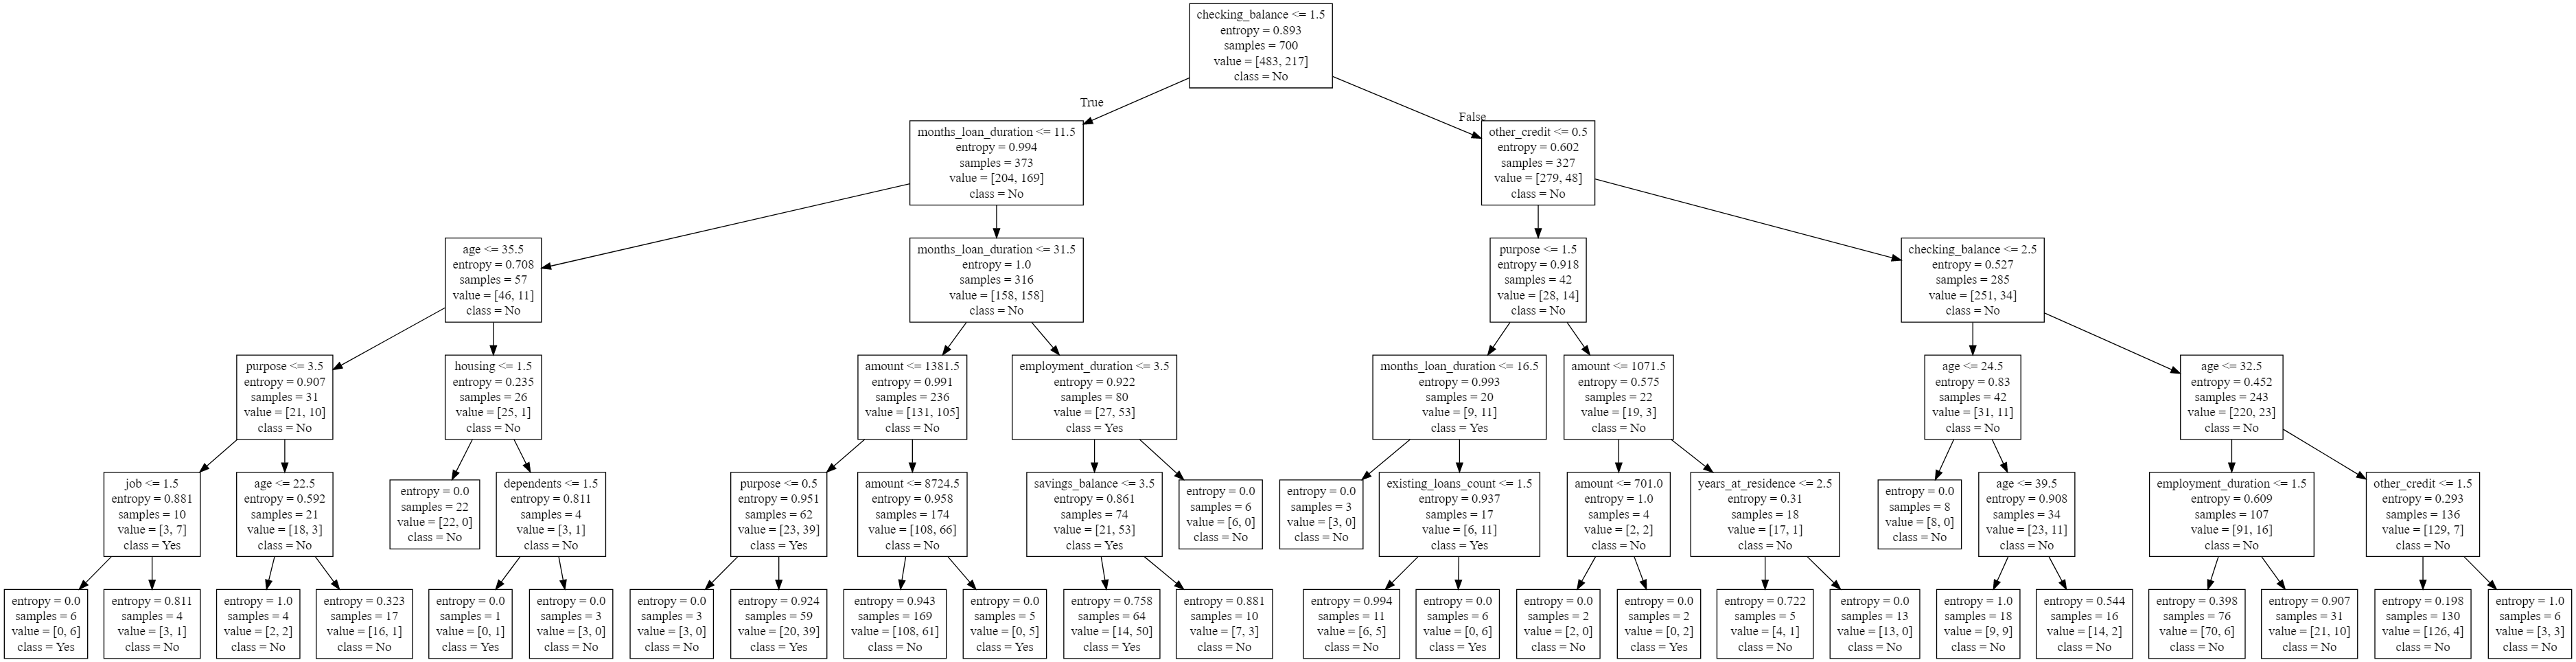

In [136]:
train_char_label = ['No', 'Yes']

Credit_Tree_File = open('D:\PGPAIML\Cred_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

system("dot -Tpng D:\PGPAIML\Cred_tree.dot -o D:\PGPAIML\Cred_tree.png")
Image("d:\PGPAIML\Cred_tree.png")

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [149]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators= 25)
rfcl = rfcl.fit(X_train, y_train)
testPreds = rfcl.predict(X_test)
testAccuracy = accuracy_score(y_test, testPreds)
print("Model Accuracy :", testAccuracy * 100)

Model Accuracy : 78.0


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [148]:
abcl = AdaBoostClassifier(base_estimator=rfcl,n_estimators= 25)
abcl.fit(X_train,y_train)
testPreds = abcl.predict(X_test)
testAccuracy = accuracy_score(y_test, testPreds)
print("Model Accuracy :", testAccuracy * 100)

Model Accuracy : 77.66666666666666


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [146]:
bgcl = BaggingClassifier(base_estimator=rfcl,n_estimators= 25)
bgcl.fit(X_train,y_train)
testPreds = bgcl.predict(X_test)
testAccuracy = accuracy_score(y_test, testPreds)
print("Model Accuracy :", testAccuracy * 100)

Model Accuracy : 78.66666666666666


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators= 25)
gbcl.fit(X_train,y_train)
testPreds=gbcl.predict(X_test)
testAccuracy = accuracy_score(y_test, testPreds)
print("Model Accuracy :", testAccuracy * 100)

Model Accuracy : 77.33333333333333


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

## Write your inference from the above models